## Probablity and Statistics

In [1]:
#Author-Vishal Burman

In [2]:
%matplotlib inline
import numpy as np
from mxnet import nd
import math
import matplotlib.pyplot as plt
import random

In [3]:
#We cast a die and store all the probablities of the numbers

In [4]:
probablities=nd.ones(6)/6

In [5]:
nd.random.multinomial(probablities)


[3]
<NDArray 1 @cpu(0)>

In [8]:
#Sometimes we want to generate many samples from a distribution
#It can be slow
#Therefore we can draw many samples by returning an array of independent samples

In [7]:
print(nd.random.multinomial(probablities, shape=(10, )))
print(nd.random.multinomial(probablities, shape=(5, 10)))


[2 2 1 5 0 5 1 2 2 4]
<NDArray 10 @cpu(0)>

[[4 3 2 3 2 5 5 0 2 0]
 [3 0 2 4 5 4 0 5 5 5]
 [2 4 4 2 3 4 4 0 4 3]
 [3 0 3 5 4 3 0 2 2 1]
 [1 4 4 2 1 3 0 0 1 3]]
<NDArray 5x10 @cpu(0)>


In [9]:
#We can now sample 1000 rolls...we can go through each of 1000 rolls to count how many times each number was rolled

In [10]:
rolls=nd.random.multinomial(probablities, shape=(1000))
counts=nd.zeros((6, 1000))
totals=nd.zeros(6)
for i, roll in enumerate(rolls):
    totals[(int)(roll.asscalar())]+=1
    counts[:, i]=totals

In [ ]:
#This shows the counts of each number during the 1000 rolls

In [15]:
counts


[[  1.   1.   1. ... 166. 166. 167.]
 [  0.   0.   1. ... 167. 167. 167.]
 [  0.   0.   0. ... 176. 176. 176.]
 [  0.   1.   1. ... 158. 158. 158.]
 [  0.   0.   0. ... 156. 157. 157.]
 [  0.   0.   0. ... 175. 175. 175.]]
<NDArray 6x1000 @cpu(0)>

In [18]:
#Normalizing the number of tosses, we get:
x=nd.arange(1000).reshape((1, 1000))+1
estimates=counts/x

In [ ]:
#We can see that after one roll...there is probablity that one number will be face up

In [20]:
estimates[:, 0]


[1. 0. 0. 0. 0. 0.]
<NDArray 6 @cpu(0)>

In [21]:
estimates[:, 1]


[0.5 0.  0.  0.5 0.  0. ]
<NDArray 6 @cpu(0)>

In [ ]:
# We can see that after 100 rolls...it converges

In [23]:
estimates[:, 100]


[0.18811882 0.14851485 0.17821783 0.1980198  0.11881188 0.16831683]
<NDArray 6 @cpu(0)>

In [ ]:
#We plot the respective probablities of every face of the die

No handles with labels found to put in legend.


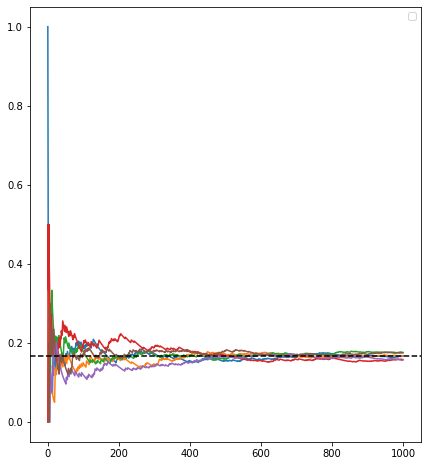

In [26]:
plt.figure(figsize=(7, 8))
for i in range(6):
    plt.plot(estimates[i, :].asnumpy())
plt.axhline(y=0.16666, color='black', linestyle='dashed')
plt.legend();